<a href="https://colab.research.google.com/github/ValentinaZubareva2906/deep_learning_mipt/blob/main/%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F%201%20%22%D0%98%D0%B3%D1%80%D0%B0%20%D0%BF%D1%80%D0%B5%D1%81%D1%82%D0%BE%D0%BB%D0%BE%D0%B2%22/game_of_thrones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект "ИГРА ПРЕСТОЛОВ. КТО ОСТАНЕТСЯ ЖИВ?"

## Описание задания

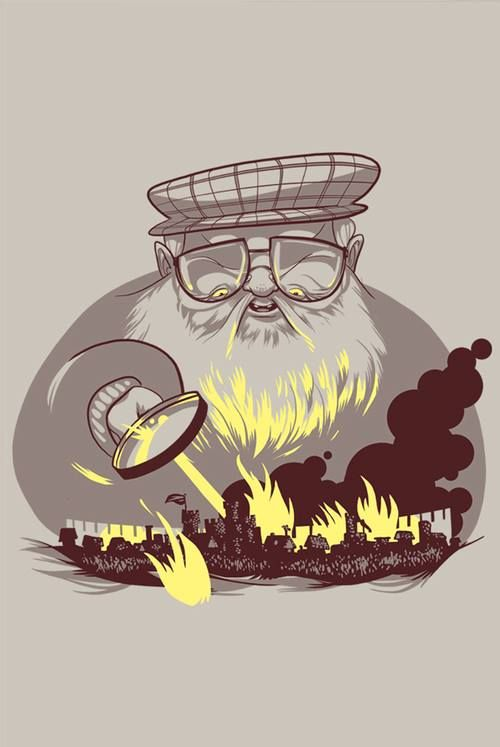

ЦЕЛЬ: необходимо предстаказать,кто из персонажей вселенной Игры престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/) останется в живых, а кто утрёт.


Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание: метрика accuracy, $score \geqslant 0.65$


## Часть 1. Анализ и предобработка данных

Перед обучением модели необходимо провести предобработку и анализ данных.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загрузка датасета

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 48.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 10.7MB/s]


**Задание 1.1.** Импортировать библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib

Далее будут импортированы все необходимые библиотеки для решения задачи.

In [3]:
!pip -q install phik

In [4]:
from phik import phik_matrix

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,  RobustScaler, OrdinalEncoder ,PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


**Задание 1.2.** Загрузить датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделать значения колонки `S.No` наименованиями строк:

In [7]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col = "S.No")

In [8]:
columnnames = ['name', 'title', 'male', 'culture', 'date_Of_Birth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'is_Alive_Mother', 'is_Alive_Father', 'is_Alive_Heir', 'is_Alive_Spouse',
       'is_Married', 'is_Noble', 'age', 'num_Dead_Relations', 'popularity',
       'is_Alive']

data = data.set_axis(axis=1, labels=columnnames)

data.columns = data.columns.str.lower()

In [9]:
print(data.columns)

Index(['name', 'title', 'male', 'culture', 'date_of_birth', 'mother', 'father',
       'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'is_alive_mother', 'is_alive_father', 'is_alive_heir',
       'is_alive_spouse', 'is_married', 'is_noble', 'age',
       'num_dead_relations', 'popularity', 'is_alive'],
      dtype='object')


In [10]:
data.describe(include = 'object').T

,count,unique,top,freq
name,1557,1557,Melara Hetherspoon,1
title,717,195,Ser,306
culture,488,51,Northmen,94
mother,18,16,Rhaenyra Targaryen,2
father,22,19,Daemon Targaryen,2
heir,21,20,Jaehaerys Targaryen,2
house,1176,315,House Frey,89
spouse,200,186,Walder Frey,6


In [11]:
data.describe(include = [np.number]).T[['count', 'min', 'max']]

,count,min,max
male,1557.0,0.0,1.0
date_of_birth,279.0,-25.0,299.0
book1,1557.0,0.0,1.0
book2,1557.0,0.0,1.0
book3,1557.0,0.0,1.0
book4,1557.0,0.0,1.0
book5,1557.0,0.0,1.0
is_alive_mother,18.0,0.0,1.0
is_alive_father,22.0,0.0,1.0
is_alive_heir,21.0,0.0,1.0


**ВЫВОД:** большинство числовых столбцов - это числа от 0 до 1. Отрицательные значения `dateOfBirth` не являются ошибкой. Значения age и `numDeadRelations` также выглядят адекватными. Можно переходить к дальнейшим шагам анализа.

Также были изменены названия столбцов.

**Задание 1.3.** Предобработка (очистка) данных.

В датасете все пропуски в данных (missing values) уже закодированы как NaN. Необходимо проанализировать, в каких колонках и как часто встречаются NaN значения. Далее необходимо будет выбрать метод обработки данных.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                1557 non-null   object 
 1   title               717 non-null    object 
 2   male                1557 non-null   int64  
 3   culture             488 non-null    object 
 4   date_of_birth       279 non-null    float64
 5   mother              18 non-null     object 
 6   father              22 non-null     object 
 7   heir                21 non-null     object 
 8   house               1176 non-null   object 
 9   spouse              200 non-null    object 
 10  book1               1557 non-null   int64  
 11  book2               1557 non-null   int64  
 12  book3               1557 non-null   int64  
 13  book4               1557 non-null   int64  
 14  book5               1557 non-null   int64  
 15  is_alive_mother     18 non-null     float64
 16  is_alive_fa

In [13]:
print(data.isna().sum())

name                     0
title                  840
male                     0
culture               1069
date_of_birth         1278
mother                1539
father                1535
heir                  1536
house                  381
spouse                1357
book1                    0
book2                    0
book3                    0
book4                    0
book5                    0
is_alive_mother       1539
is_alive_father       1535
is_alive_heir         1536
is_alive_spouse       1357
is_married               0
is_noble                 0
age                   1278
num_dead_relations       0
popularity               0
is_alive                 0
dtype: int64


**ВЫВОД:** в данном задании удалять строки с NaN (dropna) не стоит удалять по следующим причинам:
- в обучающем датасете много признаков с большим количество пропусков. Если удалять все строки с NaN, то размер выборки сильно уменьшится. Мы потеряем много данных, которые можно было бы использовать для построения более точной модели.
- тестовом датасете также много признаков с NaN (вы можете в этом убедиться, если скачаете датасет и совершите с ним те же действия, что выше проделали с обучаюшим датасетом). Поэтому нам все-равно придется придумать способ кодировать NaN, чтобы модель делала прогнозы для всех персонажей из тестового датасета. Для этого нам потребуется сохранять, а не удалять данные в обучающем датасете.     

Также в данных очень много пропущенных значений, причём в некоторых случая пропущена **большая** часть значений. Поэтому заполнять по умолчанию медианой/средним/модой в данном случае - не самый лучший способ (однако, это довольно часто используемый метод заполнения, который может пригодиться вам в будущем)


**Задание 1.4.** Числовые признаки.
Перед работой с признаками проверим данные на количество дубликатов.


In [14]:
print('Количество дубликотов строк в contract:',data.duplicated().sum())
print('Процент дубликатов строк от всего количества строк:',round(data.duplicated().sum() / data.shape[0]* 100,3))
print('Количество строк:',data.shape[0])

Количество дубликотов строк в contract: 0
Процент дубликатов строк от всего количества строк: 0.0
Количество строк: 1557


Дубликатов в данных нет. Преступаем к предобработке данных.

Работа с **признаком popularity**.  Это Численных признак, перед его обработкой необходимо построить гистограмму распределения данного признака с количеством интервалов (bins), равным 50.

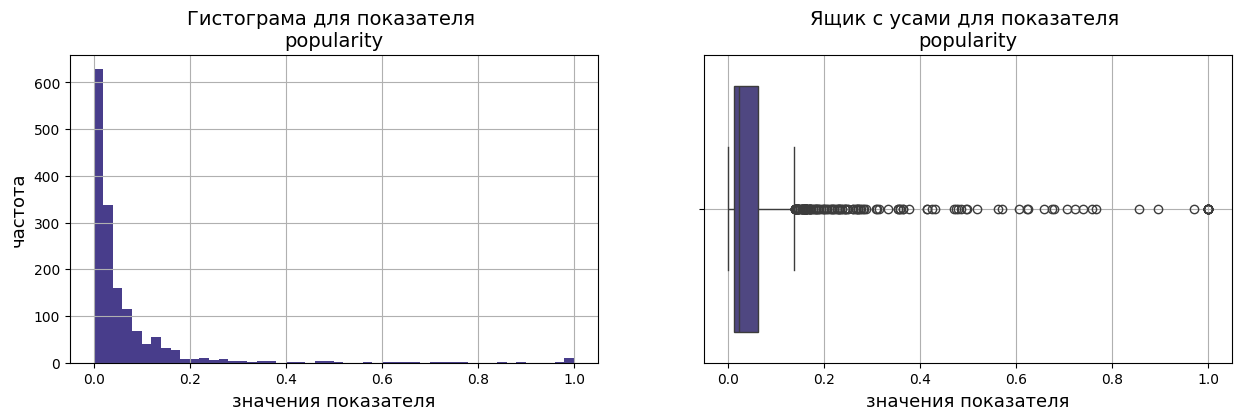

In [15]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
data['popularity'].plot(kind = 'hist',color = '#483D8B', bins = 50)
plt.title(f'Гистограма для показателя \npopularity', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.ylabel('частота', fontsize=13)
plt.grid(True)


plt.subplot(1, 2, 2)
sns.boxplot(x= data['popularity'],color = '#483D8B')
plt.title(f'Ящик с усами для показателя \npopularity', fontsize=14)
plt.xlabel('значения показателя',fontsize=13 )
plt.grid(True);

In [16]:
print('Количество данных, у которых popularity > 0.2: ',data.query('popularity >0.2')['popularity'].count())
print('Процент данных строк от всего количества: ',round(data.query('popularity >0.2')['popularity'].count() / data.shape[0]* 100,3),"%")

Количество данных, у которых popularity > 0.2:  83
Процент данных строк от всего количества:  5.331 %


**ВЫВОД:** по гистрограмме видно, что данных признак распределен несимметрично, также много выбрасов (это видно по графику ящик с усами).
При значении populacity > 0.2 количество строк составляет 83, что является менее 5.3% от всех данных. Пока данные строки удалять не будет. Проведем преобразование.

Данных признак можно преобразовать по формуле `np.log10(data["popularity"]*M+1)` (добавляем 1 ради логарифма, так как для нектоторых персонажей `popularity==0`). В качестве M будет принято число 100.

In [17]:
M = 100

In [18]:
data['popularity'] = np.log10(data['popularity']*M+1)

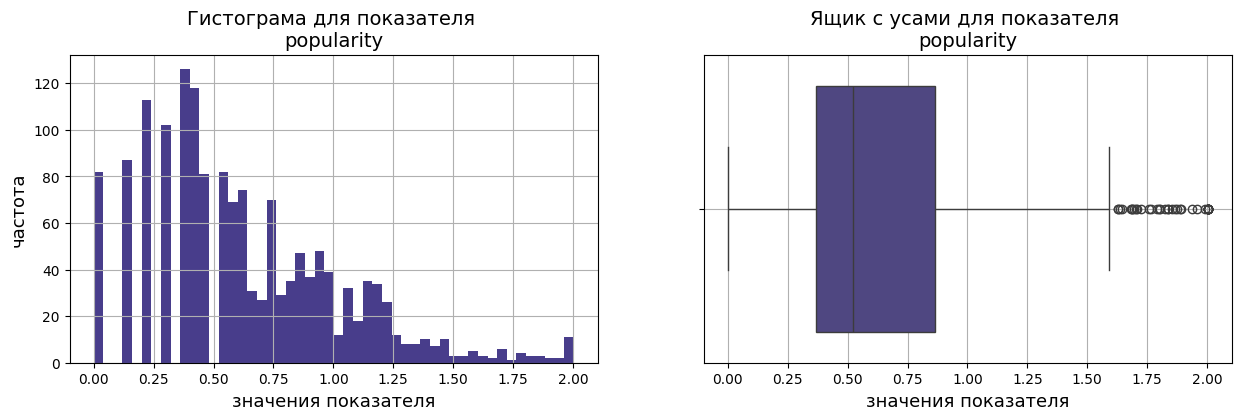

In [19]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
data['popularity'].plot(kind = 'hist',color = '#483D8B', bins = 50)
plt.title(f'Гистограма для показателя \npopularity', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.ylabel('частота', fontsize=13)
plt.grid(True)


plt.subplot(1, 2, 2)
sns.boxplot(x= data['popularity'],color = '#483D8B')
plt.title(f'Ящик с усами для показателя \npopularity', fontsize=14)
plt.xlabel('значения показателя',fontsize=13 )
plt.grid(True);

In [20]:
print('Количество данных, у которых popularity > 1.75: ',data.query('popularity >1.75')['popularity'].count())
print('Процент данных строк от всего количества: ',round(data.query('popularity >1.75')['popularity'].count() / data.shape[0]* 100,3),"%")

Количество данных, у которых popularity > 1.75:  26
Процент данных строк от всего количества:  1.67 %


**ВЫВОД:** после заполения признака наблюдается на истограмме нормальное распределение, на диаграмме ящик с усами наблюдаем увеличение попадания значений, что привело к уменьшению выбросов.
Было проведено количество строк, где показатель popularity >1.75, их - 26, что составляет менее 2% от всех данных. Было принято решение не удалять их, поскольку самих данных достаточно мало.

Далее будет проходить предобработку **признак numDeadRelations**.
Перед началом предобработки, необходимо построиить частотное распределение этого признака для числа персонажей `numDeadRelations>0`.


In [21]:
dt = data.query('num_dead_relations >0') #выделим датасет, где признак numDeadRelations >0
dt['num_dead_relations'].unique() #посмотрим на уникальные значения признака

array([11,  1,  5,  3, 12, 10,  7,  4,  6, 15,  8,  2,  9])

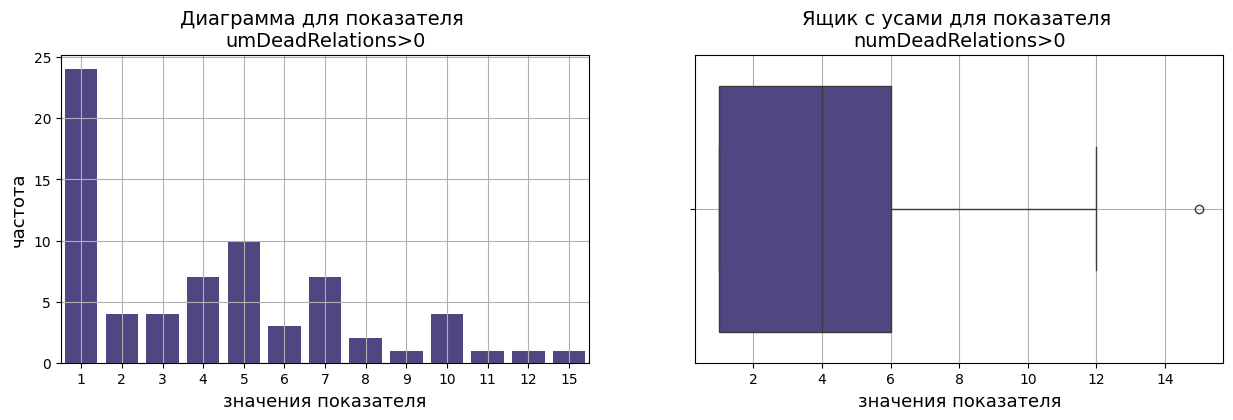

In [22]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 2, 1)
sns.countplot(x = 'num_dead_relations', data =dt, color = '#483D8B')
plt.title(f'Диаграмма для показателя \numDeadRelations>0', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.ylabel('частота', fontsize=13)
plt.grid(True)


plt.subplot(1, 2, 2)
sns.boxplot(x= dt['num_dead_relations'],color = '#483D8B')
plt.title(f'Ящик с усами для показателя \nnumDeadRelations>0', fontsize=14)
plt.xlabel('значения показателя',fontsize=13 )
plt.grid(True);

In [23]:
print('Количество данных, у которых numDeadRelations: ',dt.query('num_dead_relations >14')['num_dead_relations'].count())
print('Процент данных строк от всего количества: ',round(dt.query('num_dead_relations >14')['num_dead_relations'].count() / dt.shape[0]* 100,3),"%")

Количество данных, у которых numDeadRelations:  1
Процент данных строк от всего количества:  1.449 %


Необходимо создать признак `boolDeadRelations`для этого упростим `numDeadRelations`, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

In [24]:
data['bool_dead_relations'] = (data['num_dead_relations'] != 0).astype(str).str.replace('True','yes').str.replace('False','no') #замена признака

In [26]:
print(data['bool_dead_relations'].unique())#проверка уникальных значений bool_dead_relasions

['yes' 'no']


In [29]:
display(data[['num_dead_relations','bool_dead_relations' ]].head(5)) #проверка правильности заполнения переменной

,num_dead_relations,bool_dead_relations
S.No,,
1,11,yes
2,1,yes
3,0,no
4,0,no
5,0,no


**ВЫВОД** был введен новый признак `boolDeadRelations`, который показывает были ли у персонажа хоть какие то отношения с мертвыми персонажами, т.е. `numDeadRelations > 0`, и те, у которых не было, т.е. `numDeadRelations = 0`.

Наконец, давайте посмотрим на **признак age**. В нем очень много пропущенных значений. Для того, чтобы использовать в модели информацию о возрасте персонажа, мы создадим два новых признака: `age_value` и `age_no_data`

- Там где возраст указан, age_value принимает значение `age`, а `age_no_data` - значение 0.
- Там где возраст не указан, `age_value` принимает значение 0, а `age_no_data` - значение 1.  

Фактически, в переменной `age` мы заменяем NaN на 0, но одновременно добавляем в модель еще один бинарный признак `age_no_data`, несущий информацию о том, у каких персонажей не был указан возраст:        

In [ ]:
#data['age'] = data['age'].fillna(data['age'].median())

In [ ]:
data['age_value'] = [0 if np.isnan(x) else x for x in data['age']]# ДОБАВЬТЕ ВАШ КОД
data['age_no_data'] = [1 if np.isnan(x) else 0 for x in data['age']]

In [ ]:
display(data[['age','age_value', 'age_no_data']].sample(10))

In [ ]:
dt1 = data.query('age >0')

In [ ]:
plt.figure(figsize=(25, 5))

sns.countplot(x = 'age', data =dt1, color = '#483D8B')
plt.title(f'Диаграмма для показателя \nage_value>0', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.xticks(rotation=45);
plt.ylabel('частота', fontsize=13)
plt.grid(True)

In [ ]:
data['date_value'] = [0 if np.isnan(x) else x for x in data['dateOfBirth']]# ДОБАВЬТЕ ВАШ КОД
data['date_no_data'] = [1 if np.isnan(x) else 0 for x in data['dateOfBirth']]

In [ ]:
dt2 = data.query('date_value >0')

In [ ]:
plt.figure(figsize=(25, 5))

sns.countplot(x = 'date_value', data =dt2, color = '#483D8B')
plt.title(f'Диаграмма для показателя \nage_value>0', fontsize=14)
plt.xlabel('значения показателя', fontsize=13)
plt.xticks(rotation=45);
plt.ylabel('частота', fontsize=13)
plt.grid(True)

Этот способ чем-то похож на работу с категориальной переменными с пропущенными значениями, когда мы добавляем еще одну категорию no_data и заменяем NaN на значение этой категории.

Если вы заходите похожим образом образом обработать признак `dateOfBirth`, **обратите внимание**, что у одних и тех же персонажей не указан и возраст, и год рождения.
То есть созданные признаки `age_no_data` и `dateOfBirth_no_data` будут полностью совпадать, и в модель надо будет включать только один из признаков: или `age_no_data`, или `dateOfBirth_no_data`.

**Задание 1.5.** Категориальные признаки с большим количеством категорий

**Признак culture** содержит информацию о принадлежности к одному из народов во вселенной Игры Престолов.

Давайте посмотрим, какие значения принимает данный признак. По умолчанию метод `value_counts()` игнорирует пропуски в данных, поэтому используем этот метод с параметром **dropna** со значением **False** (см. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [ ]:
print(data['culture'].value_counts(dropna=False))#...ДОБАВЬТЕ ВАШ КОД

Из полученного частотного распределения видно, что для большого числа персонажей значения данного признака не указаны. Также есть много редких значений признака, которые в выборке повторяются один или несколько раз. Причина отчасти в том, что один и тот же народ упоминается в нашем датасете под разными названиями.

Данную проблему мы попытаемся решить, сгруппировав народы в более крупные категории. Так мы одновременно решим проблему того, что один и тот же народ назван в выборке разными способами.

Предоженный вариант группировки имеет определенную логику. Выделяются следующие группы:
- старые нации, которые уже не сущевали как отдельные народы на момент повествования основной линии повествования романов, но отдельные потомки могли еще быть живы
- народы, проживающие в королевствах континента Весторос (для каждого королевства - своя группа)
- народы континента Эссос
- прочие народы

**Обратите внимание, что некоторые варианты названий народов встречаются только в тестовых данных, и не встречаются в обучающих данных.** Такая ситуация нередко случается на практике. Поэтому, после обработки обучающих данных и обучения модели важно задать для модели правило, как она должна обрабатывать "незнакомые" категории в категориальных признаках. Например, можно относить объекты с "незнакомой" категорией к некоторой существующей категории или указать формулу расчета для "незнакомой" категории.     

Предложенный вам словарь `cultures_grouped` составлен по всем значениям признака `culture`, встречающимся в тренировочном либо в тестовом датасете. Здесь важно, что все укрупненные категории (ключи/keys словаря `cultures_grouped`) представлены в обоих датасетах, а уникальные для тестового датасета названия народов - это отдельные названия народов внутри укрупненных категорий (значения/values словаря). Поэтому, когда вы будете работать с тестовыми - просто применяйте этот словарь без указания правила обработки "незнакомых" категорий.

Давайте приступим к кодировке значений признака culture.
Для этого сначала инвертируем словарь *cultures_grouped*

Теперь создадим новый столбец с укрупненными значениями culture.

Для этого будем использовать метод `map()` с инвертированным словарем в качестве аргумента (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.map.html)

Обратите внимание, что в словаре названия народов указаны в нижнем регистре. А в датасете используется как нижний, так и верхний регистр. Поэтому перед применением метода `map()` переведем значения столбца culture в нижний регистр при помощи метода `str.lower()` (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.lower.html).

Осталось заменить все NaN в созданном столбце на категорию `culture_no_data`:

In [ ]:
cultures_grouped = {
    'Old Nations': ['valyrian', 'first men', 'andal', 'andals', 'rhoynar'],
    'the North': ['northmen', 'northern mountain clans', 'crannogmen'],
    'the Iron Islands': ['ironborn', 'ironborn', 'ironmen'],
    'the Mountain and the Vale': ['valemen', 'vale', 'vale mountain clans',
                              'sistermen'],
    'Isles,Rivers,Stormlands and Rock': ['riverlands', 'rivermen', 'stormlander', 'stormlands',
                                            'westerman', 'westermen', 'westerlands'],
    'the Reach and Dorne': ['reach', 'reachmen', 'the reach', 'dornish', 'dornishmen', 'dorne'],
    'Essos Nations': ['astapor', 'astapori', 'braavosi', 'braavos', 'tyroshi', 'lysene', 'lyseni',
                      'myrish', 'pentoshi', 'qartheen', 'qarth', 'dothraki',
                      'lhazarene', 'lhazareen','meereen', 'meereenese',
                      'norvoshi', 'qohor', 'summer isles', 'summer islands',
                      'summer islander', 'asshai', "asshai'i", 'norvos', 'ghiscari',
                      'ghiscaricari'],
    'Other Nations': ['ibbenese', 'westeros', 'free folk', 'wildling', 'wildlings', 'naathi']}

In [ ]:
cultures_grouped_inverted = {}

for k in cultures_grouped.keys():
  for v in cultures_grouped[k]:
    cultures_grouped_inverted.update({v:k})

In [ ]:
data['culture_grouped'] = data['culture'].str.lower().map(cultures_grouped_inverted)
data['culture_grouped'] = data['culture_grouped'].str.lower().str.replace(' ','_')

In [ ]:
data['culture_grouped'] = data['culture_grouped'].fillna(value='culture_no_date')

In [ ]:
print(data['culture_grouped'].value_counts(dropna=False))

In [ ]:
display(data.sample(5))

In [ ]:
platf_max = data.pivot_table(index = 'culture_grouped', values = 'name', aggfunc = 'count').sort_values(by = 'name', ascending = False)


In [ ]:
data_n = data.query('culture_grouped != "culture_no_date"')

platf = data_n.pivot_table(index = 'culture_grouped', values = 'name', aggfunc = 'count').sort_values(by = 'name', ascending = False)


platf.plot(kind = 'pie',subplots=True, startangle=90,figsize=(7, 7),autopct='%.0f%%', labeldistance=None);
plt.xlabel("")
plt.ylabel("")
plt.title('Круговая диаграмма вклада со свех продаж разных платформ')
plt.show()

Распределение сгруппированной переменной выглядит гораздо лучше. Но по прежнему есть несколько слабо представленых групп.

Дальнейшую работу с этим признаком проводите на свое усмотрение для повышения качества прогноза модели. Например, можно объединить несколько слабо представленных категорий в одну или применить другой подход.

In [ ]:
#print(data['culture'].value_counts(dropna=False).head(35))

In [ ]:
#print(data['title'].unique())

In [ ]:
title_grouped = data.title.value_counts().loc[lambda x: x > 10].index
title_grouped

In [ ]:
data.loc[~data["title"].isin(title_grouped), "title"] = "title_no_date" # replace rare titles with one value
data['title'] = data['title'].str.lower().str.replace(' ','_')
data.title.value_counts()

In [ ]:
house__grouped = data.house.value_counts().loc[lambda x: x > 15].index # the same for houses
house__grouped

In [ ]:
data.loc[~data.house.isin(house__grouped), "house"] = "house_no_date"
data['house'] = data['house'].str.lower().str.replace(' ','_')
data.house.value_counts()

In [ ]:
print(data.isna().sum())

**Задание 1.6.** Категориальные признаки в линейных моделях

Для включения категориальных признаков в линейную модель их нужно преобразовать в числовые признаки.

Если признак принимает одно из двух возможных значений (например, персонаж "появляется" или "не появляется" в 1-й книге), он напрямую кодируется в бинарный признак ("появляется" -> 1, "не появляется" -> 0). Если признак принимает больше двух значений, его можно преобразовать в несколько бинарных при помощи one-hot преобразования. В некоторых случаях бывает полезно объединить некоторые категории, как мы это поступили с признаком *culture*.

Порядковых признаков у нас в задаче нет, поэтому рассматривать их здесь мы не будем.

Для того, чтобы найти все порядковые признаки, посмотрим на количество уникальных значений, которые встречаются в столбцах. Для столбцов с типом object количество уникальных значений мы выводили  при помощи метода `describe()` в задании 1.2.

Чтобы посмотреть количество уникальных значений для всех столбцов, можно воспользоваться методом nunique() (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.nunique.html)

In [ ]:
# Количество уникальнх значений в каждом столбце
data.nunique()

In [ ]:
# Для числовых столбцов можно вывести в одну таблицу более детальную статистику, объединив выводы describe() и nunique()
# Код ниже требуется дополнить по аналогии с заданием 1.2.
data.describe(include = [np.number]).T[['count', 'min', 'max']].assign(N_unique_values = data.nunique())

Посмотрев на количество уникальных значений мы можем выделить категориальные признаки. Например, `popularity` принимает значения от 0 до 1, но это непрерывный числовой признак. Остальные признаки со значениями от 0 до 1 - принимают только два значения, то есть являются бинарными.

Бинарные признаки без NaN полностью готовы для включения в модель. Некоторые бинарные признаки содержат пропуски, поэтому, если вы захотите включить их в модель, их потребуется обработать.

Для бинарных признаков их связь с зависимой переменной можно прикинуть по таблице корреляций. Для категориальных признаков с количеством значений больше двух (или с двумя значениями и NaN) можно сделать one-hot преобразования и посчитать корреряцию зависимой переменной с набором сгенерированных бинарных признаков.
В качестве альтернативного подхода можно использовать сравнение средних значений зависимой переменной для разных категорий исследуемого признака. Чем сильнее различаются средние значения целевой переменной между категориями, тем вероятнее, что данный признак связан с зависимой переменной.

In [ ]:
# попробуйте провести сравнение средних зависимой пременной isAlive для признака isAliveSpouse
# одним из приведенных ниже способов:

#data.groupby('isAliveSpouse', dropna = False)['isAlive'].mean()
#pd.pivot_table(data = data, values = 'isAlive', index = 'isAliveSpouse', aggfunc=['mean', 'count'], dropna=False)

In [ ]:
list = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse' ]

for word in list:
  #data[word] = data[word].str.replace(' ','_').str.lower()
  print(f'уникальные значения столбца {word}: {data[word].unique()}\n')

In [ ]:
list = ['mother', 'father',
       'heir', 'spouse']

for word in list:
  #data[word] = data[word].fillna(value = 'unknown')
  print(f'уникальные значения столбца {word}: {data[word].unique()}\n')

In [ ]:
list = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

for word in list:
  data[word] = data[word].astype('str').replace('1.0','yes').str.replace('0.0','no')
  data[word] = data[word].replace('nan','unknown')

  print(f'уникальные значения столбца {word}: {data[word].unique()}\n')

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик. Не забудьте, что потом аналогичным образом вам надо будет преобразовывать тестовый датасет, используя тот же алгоритм кодирования признаков.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# ...

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [ ]:
!pip -q install phik

In [ ]:
from phik import phik_matrix

In [ ]:
print(data.isna().sum())

In [ ]:
data_new  = data
data_new = data_new.drop(['culture', 'dateOfBirth','mother','father', 'age', 'heir', 'numDeadRelations','name','spouse'], axis=1)
data_new = data_new.drop(['date_no_data'], axis=1)

In [ ]:
print(data_new.isna().sum())

In [ ]:
display(data_new.head())

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# ...
plt.figure(figsize=(11, 11));
sns.heatmap(
    data_new.phik_matrix(interval_cols=['popularity', 'age_value', 'date_value'])
    ,annot = True
    ,fmt = '.2f'
    ,linewidth=.5
    ,cmap = "ocean_r"
);
plt.title('Тепловая карта кореляциии признаков', fontsize=17);

In [ ]:
data_new = data_new.drop(['isAliveHeir','isAliveSpouse','date_value'], axis=1)

In [ ]:
plt.figure(figsize=(11, 11));
sns.heatmap(
    data_new.phik_matrix(interval_cols=['popularity', 'age_value'])
    ,annot = True
    ,fmt = '.2f'
    ,linewidth=.5
    ,cmap = "ocean_r"
);
plt.title('Тепловая карта кореляциии признаков', fontsize=17);

In [ ]:
data_new = data_new.drop(['isAliveMother','age_no_data'], axis=1)

In [ ]:
plt.figure(figsize=(11, 11));
sns.heatmap(
    data_new.phik_matrix(interval_cols=['popularity', 'age_value'])
    ,annot = True
    ,fmt = '.2f'
    ,linewidth=.5
    ,cmap = "ocean_r"
);
plt.title('Тепловая карта кореляциии признаков', fontsize=17);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, которые вы отобрали для включения в модель, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X =  data_new.drop('isAlive', axis=1)
y = data_new['isAlive']

In [ ]:
data_new['isAlive'].value_counts(normalize=True).plot(kind='bar', color = '#8B0A50')
plt.title('Классы',fontsize=14)
plt.xlabel('Значения показателя', fontsize=13)
plt.ylabel('Частота', fontsize=13)
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

**Задание 1.10.** Разделите датасет обучащую и валидационные части (train и val) при помощи функции `train_test_split` (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
RANDOM_STATE = 42
TEST_SIZE = 0.2

In [ ]:
# не забудьте в функции train_test_split задать параметр random_state,
# чтобы обеспечить повторяемость разбиения выборки на train и validation части.
# Это позволит сравнивать метрики моделей с различными методами подготовки признаков
X_train, X_val, y_train, y_val =  train_test_split(X, y, test_size=TEST_SIZE,random_state = RANDOM_STATE, stratify=y)

In [ ]:
print(
    f'Разделение выборки в следующих пропорциях:\n'
    f'{(len(X_train)/len(data)):.0%} — тренировочная;\n'
    f'{(len(X_val)/len(data)):.0%} — валидационная;'
)

In [ ]:
print(
    f'Размер матриц:\n'
    f'{X_train.shape[0], y_train.shape[0]} — тренировочная;\n'
    f'{X_val.shape[0], y_val.shape[0]} — валидационная;\n'
)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.**


Вым можете работать с одно из предложенных моделей из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


Однако в этом домашнем задании мы предлагаем выбрать и поработать с моделью `LogisticRegression`.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder,  RobustScaler, OrdinalEncoder ,PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

In [ ]:
data_new.columns

In [ ]:
num_columns = ['popularity', 'age_value']
#ohe_columns = [ ]
#ord_columns = ['culture_grouped','house_category', 'title_category']

ord_columns = ['male', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveFather',
       'isMarried', 'isNoble', 'boolDeadRelations', 'culture_grouped', 'house', 'title'
       ]

In [ ]:
#ohe_pipe = Pipeline([('ohe', OneHotEncoder(drop='first', handle_unknown='error'))])

In [ ]:
ord_pipe = Pipeline([('ord',OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=np.nan))])

In [ ]:
num_pipe = Pipeline([('robustscaler', RobustScaler()),
                ('powertransform', PowerTransformer())])

In [ ]:
data_preprocessor_lir = ColumnTransformer(
    [('ord', ord_pipe, ord_columns),
     ('num',RobustScaler(), num_columns)],
    remainder='passthrough'
)

In [ ]:
pipe_lir = Pipeline(
    [
        ('preprocessor', data_preprocessor_lir),
        ('lir', LogisticRegression(class_weight = 'balanced',solver='liblinear',random_state = RANDOM_STATE, penalty='l1'))

    ]
)

In [ ]:
parameters_lir = {
    'lir__C': [1, 10, 50],
    #'lir__max_iter': [10, 50, 100],
}

In [ ]:
lir_grid = GridSearchCV(pipe_lir, parameters_lir, cv=3, scoring='accuracy')

In [ ]:
lir_grid.fit(X_train, y_train)

In [ ]:
lir_fit_score = lir_grid.best_score_
print('Лучшая модель и её параметры:', lir_grid.best_estimator_)
print(f'Лучший показатель ROC-AUC: {lir_fit_score:.3f}')

In [ ]:
y_pred = lir_grid.best_estimator_.predict(X_val)

In [ ]:
y_pred

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print('AUC-ROC на тестовом наборе данных:', round(accuracy, 4))

In [ ]:
pipe_random = Pipeline(
    [
        ('preprocessor', data_preprocessor_lir),
        ('random', RandomForestClassifier(random_state=RANDOM_STATE, class_weight='balanced',verbose=False ))
    ]
)

In [ ]:
param_random = {
    'random__n_estimators': [90,100,125,150],
    'random__max_depth': range(1,10)
}

In [ ]:
random_grid = GridSearchCV(pipe_random, param_random, scoring='accuracy', cv=3, n_jobs=-1, error_score = 'raise')

In [ ]:
random_grid.fit(X_train, y_train)
random_fit_score = random_grid.best_score_
print('Лyчшая модель и её параметры:', random_grid.best_estimator_)
print(f'Лучший показатель ROC-AUC: {random_fit_score:.3f}')

In [ ]:
y_pred = random_grid.best_estimator_.predict(X_val)

In [ ]:
accuracy = accuracy_score(y_val, y_pred)
print('AUC-ROC на тестовом наборе данных:', round(accuracy, 4))

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных

# ваш код здесь

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy : %.4f" % accuracy)

Возможно, вы решите вернуться на несколько шагов и попробовать другие варианты преобразования и подбора признаков в модель. **Выберите** лучшую модель.

### Тестовый датасет

В самом начале нашего домашнего задания мы скачивали тестовый датасет. Загрузите его в Pandas DataFrame при помощи функции read_csv

In [ ]:
data_1 = pd.read_csv('/content/game_of_thrones_test.csv', index_col = "S.No")

In [ ]:
display(data_1.head())

In [ ]:
#Подсказка
data_1.loc[data_1['age']<0] # Находим данные с ошибками в дате рождения и возрасте

In [ ]:
#Вы можете аккуратно поправить тестовые данные, воспользовавшись, например следующим кодом:
data_1.loc[1685, 'age'] = 0.
data_1.loc[1869, 'age'] = 0.
# замены в строке 1685: dateOfBirth -> 278. и age -> 0.
# замены в строке 1869: dateOfBirth -> 299. и age -> 0.

In [ ]:
data_1.loc[data_1['age']<0]

In [ ]:
M = 100

In [ ]:
data_1['popularity'] = np.log10(data_1['popularity']*M+1)

In [ ]:
data_1['boolDeadRelations'] = (data_1['numDeadRelations'] != 0).astype(str).str.replace('True','yes').str.replace('False','no')

In [ ]:
data_1['boolDeadRelations'].unique()

In [ ]:
data_1['age_value'] = [0 if np.isnan(x) else x for x in data_1['age']]# ДОБАВЬТЕ ВАШ КОД
data_1['age_no_data'] = [1 if np.isnan(x) else 0 for x in data_1['age']]

In [ ]:
data_1['date_value'] = [0 if np.isnan(x) else x for x in data_1['dateOfBirth']]# ДОБАВЬТЕ ВАШ КОД
data_1['date_no_data'] = [1 if np.isnan(x) else 0 for x in data_1['dateOfBirth']]

In [ ]:
data_1['culture_grouped'] = data_1['culture'].str.lower().map(cultures_grouped_inverted)
data_1['culture_grouped'] = data_1['culture_grouped'].str.lower().str.replace(' ','_')

In [ ]:
data_1['culture_grouped'] = data_1['culture_grouped'].fillna(value='culture_no_date')

In [ ]:
data_1['culture_grouped'].unique()

In [ ]:
#data_1['title'].unique()

In [ ]:
data_1.loc[~data_1["title"].isin(title_grouped), "title"] = "title_no_date" # replace rare titles with one value
data_1['title'] = data_1['title'].str.lower().str.replace(' ','_')
data_1.title.value_counts()

In [ ]:
data_1.loc[~data_1.house.isin(house__grouped), "house"] = "house_no_date"
data_1['house'] = data_1['house'].str.lower().str.replace(' ','_')
data_1.house.value_counts()

In [ ]:
list = ['isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse']

for word in list:
  data_1[word] = data_1[word].astype('str').replace('1.0','yes').str.replace('0.0','no')
  data_1[word] = data_1[word].replace('nan','unknown')

  print(f'уникальные значения столбца {word}: {data_1[word].unique()}\n')

In [ ]:
data['title'].unique()

In [ ]:
data_nn = data_1[['male', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveFather', 'isMarried', 'isNoble',
       'popularity', 'boolDeadRelations', 'age_value',
       'culture_grouped', 'house', 'title']]

In [ ]:
data_nn.shape

In [ ]:
y_pred = random_grid.best_estimator_.predict(data_nn)

In [ ]:
print(y_pred.sum())

По аналогии с тем, как мы работали с обучающим датасетом, давайте посмотрим в тестовом датасете на статистики признаков с разными типами данных  

Преобразуйте признаки в тестовом датасете по тому же пайплайну, как вы преобразовывали обучающие данные. Примените вашу лучшую модель на тестовом датасете для получения прогноза целевой переменной `isAlive`

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
display(submission.head())

In [ ]:
submission['isAlive'] = y_pred

In [ ]:
submission

Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)